# 1. load the data

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
seed = 24

def load_data(filename):
    data = pd.read_csv(filename)
    X = data.iloc[:, 2:]
    y = data.iloc[:, 1]
    return X, y


X, y = load_data('../output.csv')
# load_data('../Feature Selection/output_after_feature_selection.csv')

In [88]:
X

,Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,TumourStage,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,41.0,0,0,0,1,3,3,1,1,2,...,0.517172,0.375126,3.325332,0.002314,3.880772e+06,473.464852,0.000768,0.182615,0.030508,0.000758
1,39.0,1,1,0,0,3,3,1,1,2,...,0.444391,0.444391,3.032144,0.005612,2.372010e+06,59.459710,0.004383,0.032012,0.001006,0.003685
2,31.0,0,0,0,1,2,1,1,0,2,...,0.534549,0.534549,2.485848,0.006752,1.540027e+06,33.935384,0.007584,0.024062,0.000529,0.006447
3,35.0,0,0,0,1,3,3,1,1,3,...,0.506185,0.506185,2.606255,0.003755,6.936741e+06,46.859265,0.005424,0.013707,0.000178,0.004543
4,61.0,1,0,0,0,2,1,1,0,2,...,0.462282,0.462282,2.809279,0.006521,1.265399e+06,39.621023,0.006585,0.034148,0.001083,0.005626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,58.5,1,0,1,0,3,2,1,1,4,...,0.476493,0.476493,2.453583,0.003229,2.327038e+06,18.562377,0.013766,0.018042,0.000288,0.012257
396,34.3,0,0,0,1,3,3,1,0,2,...,0.418382,0.418382,2.995603,0.004243,1.005061e+06,156.627179,0.002228,0.136015,0.022148,0.002098
397,53.3,0,0,0,1,2,1,1,0,2,...,0.527779,0.527778,1.500000,0.003728,2.132007e+05,0.996746,0.252582,0.007380,0.000037,0.231059
398,68.8,1,0,0,0,3,3,1,1,3,...,0.313693,0.313693,3.573557,0.001112,2.008034e+07,204.864200,0.001372,0.054063,0.003697,0.001368


In [89]:
y

0      144.000000
1      142.000000
2      135.000000
3       12.000000
4      109.000000
          ...    
395     54.500000
396     49.250000
397     48.500000
398     47.500000
399     46.916667
Name: RelapseFreeSurvival (outcome), Length: 400, dtype: float64

In [90]:
def feature_selection(X, y, count):
    # Train a Random Forest model
    model = RandomForestRegressor(random_state=seed)
    model.fit(X, y)

    # Get feature importance
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print(feature_importance)

    # Select features with importance above a threshold
    selected_features = feature_importance[:count]["Feature"]
    print("Selected Features:\n", selected_features)
    X = X[selected_features]
    return X


X = feature_selection(X, y, 30)

                                  Feature  Importance
36              original_firstorder_Range    0.036470
30           original_firstorder_Kurtosis    0.034249
105  original_glszm_SizeZoneNonUniformity    0.034170
110            original_glszm_ZoneEntropy    0.030326
0                                     Age    0.026439
..                                    ...         ...
65               original_glcm_SumEntropy    0.000852
116               original_ngtdm_Contrast    0.000745
55                      original_glcm_Idn    0.000645
61             original_glcm_JointEntropy    0.000603
58          original_glcm_InverseVariance    0.000544

[118 rows x 2 columns]
Selected Features:
 36                             original_firstorder_Range
30                          original_firstorder_Kurtosis
105                 original_glszm_SizeZoneNonUniformity
110                           original_glszm_ZoneEntropy
0                                                    Age
31                     

In [91]:
X

,original_firstorder_Range,original_firstorder_Kurtosis,original_glszm_SizeZoneNonUniformity,original_glszm_ZoneEntropy,Age,original_firstorder_Maximum,original_firstorder_Variance,original_glrlm_ShortRunHighGrayLevelEmphasis,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_InterquartileRange,...,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_glcm_Imc1,original_shape_MajorAxisLength,original_shape_LeastAxisLength,original_shape_Sphericity,original_gldm_SmallDependenceEmphasis,original_glszm_ZonePercentage,original_glrlm_RunVariance,original_firstorder_Minimum,original_firstorder_Median
0,3.366632,4.594629,5.969697,3.325332,41.0,2.114799,0.141574,0.789987,0.174026,0.406537,...,0.011679,-0.149786,32.844370,23.781937,0.771675,0.005563,0.002314,19.138811,-1.251833,0.217628
1,4.964442,3.884960,15.850000,3.032144,39.0,3.857952,0.441115,0.442279,0.318599,0.730463,...,0.012337,-0.070082,43.504095,20.715461,0.603481,0.006518,0.005612,44.699577,-1.106491,1.632745
2,4.867321,4.760064,20.405405,2.485848,31.0,3.841710,0.316651,0.503046,0.231278,0.509910,...,0.013216,-0.048997,36.435505,21.659822,0.608183,0.007181,0.006752,38.588656,-1.025610,1.153095
3,3.881506,3.421056,25.554455,2.606255,35.0,3.030400,0.306963,0.399896,0.309734,0.740609,...,0.010811,-0.056651,53.050724,26.590504,0.474509,0.004902,0.003755,48.370607,-0.851106,1.660720
4,3.181566,3.107181,12.551724,2.809279,61.0,2.315364,0.301317,0.473278,0.324996,0.787978,...,0.012956,-0.061986,27.265716,20.456571,0.756228,0.007222,0.006521,41.234090,-0.866201,1.311328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3.930941,3.692904,6.384615,2.453583,58.5,3.159904,0.311048,0.517839,0.289602,0.673483,...,0.011136,-0.097812,51.658584,13.993705,0.574024,0.004649,0.003229,26.276023,-0.771037,1.648004
396,5.459491,2.450481,5.357143,2.995603,34.3,3.522101,1.192819,0.709750,0.667850,1.649980,...,0.013711,-0.255937,25.548740,18.563747,0.601545,0.007409,0.004243,13.932477,-1.937390,1.010735
397,3.990703,2.056989,1.500000,1.500000,53.3,3.625107,0.789961,0.776598,0.585934,1.459563,...,0.014066,-0.042903,18.813092,8.413409,0.670158,0.005147,0.003728,7.116633,-0.365596,1.666706
398,4.884933,3.778624,3.533333,3.573557,68.8,3.157803,0.505348,0.311291,0.369673,0.869352,...,0.007976,-0.351849,37.616059,31.501627,0.758747,0.002679,0.001112,43.149249,-1.727129,1.394260


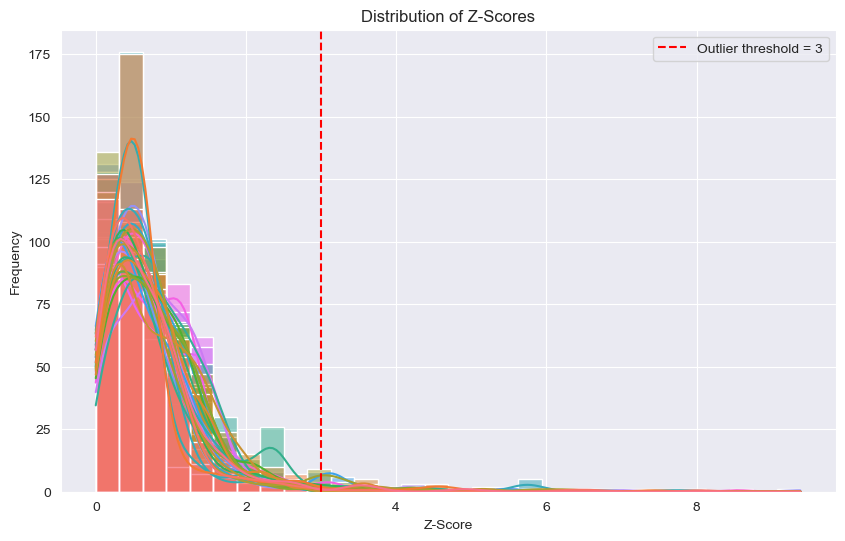

Removed 62 outliers from the data.
(338, 30) (338,)


In [92]:
def zscoree(X, y_reg):
    # 假设 X 是特征，y_reg 是目标变量

    # 计算 Z-Score
    z_scores = zscore(X)

    # 计算所有特征的 Z-Score的绝对值
    z_scores_flat = np.abs(z_scores)

    # 绘制 Z-Score 分布图
    plt.figure(figsize=(10, 6))
    sns.histplot(z_scores_flat, bins=30, kde=True)
    plt.title("Distribution of Z-Scores")
    plt.xlabel("Z-Score")
    plt.ylabel("Frequency")
    plt.axvline(x=3, color='r', linestyle='--', label="Outlier threshold = 3")
    plt.legend()
    plt.show()

    # 设置 Z-Score 阈值
    threshold = 3

    # 找到所有 Z-Score 超过阈值的样本（每个特征的 Z-Score 超过阈值的样本）
    outliers = (np.abs(z_scores) > threshold).any(axis=1)  # 检查任意一个特征的 Z-Score 是否超出阈值

    # 删除异常值
    X = X[~outliers]
    y_reg = y_reg[~outliers]

    # 输出去除的异常值个数
    print(f"Removed {np.sum(outliers)} outliers from the data.")
    print(X.shape, y_reg.shape)
    return X, y_reg


X, y = zscoree(X, y)

In [93]:
def split_data_into_test_and_train(X, y):
    np.random.seed(42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = split_data_into_test_and_train(X, y)

# 2. Linear Reg

In [94]:
def linear_reg(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)

    print("Model Coefficients:", model.coef_)
    print("Model Intercept:", model.intercept_)

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error (MAE):", mae)
    return model


model = linear_reg(X_train, X_test, y_train, y_test)

Mean Squared Error (MSE): 801.020436630635
R-squared (R2): 0.10530978586684847
Model Coefficients: [ 1.86440093e+09  1.63893297e+01  1.43684384e+00  3.55609509e+00
 -1.44757320e-01 -1.86440094e+09  3.77798205e+01  8.99179390e+01
 -8.35406935e+01  6.04944624e+01 -1.19538754e+02 -1.89840126e+01
  3.02795150e+01  7.37610516e-01  6.57027296e+01  2.28501809e+00
 -2.08995426e-01  4.81158163e+00 -2.40225239e-01 -1.05411691e+02
 -9.03103222e+03  3.49822151e+00 -9.47816693e-01 -9.93221028e-01
  3.07763329e+01  7.84789905e+03  1.46892401e+03 -5.87307795e-02
  1.86440093e+09  4.41493672e+01]
Model Intercept: 88.83230522190848
Mean Absolute Error (MAE): 21.935920158446248


In [95]:
# import matplotlib.pyplot as plt
#
# # Ensure X is in DataFrame format for column access (if not already)
# X_test = pd.DataFrame(X_test, columns=X.columns)
#
# # Generate predictions for the full range of X values for visualization
# X_full_range = pd.concat([X_train, X_test])  # Combine training and testing data
# y_full_pred = model.predict(X_full_range)
#
# # Visualization: Plot for each feature
# for feature in X.columns:
#     plt.figure(figsize=(8, 6))
#
#     # Scatter plot of actual data (testing points)
#     plt.scatter(X_test[feature], y_test, color='blue', label='Actual Data (Test)', alpha=0.6)
#
#     # Line plot of predictions (model's regression line)
#     sorted_indices = X_full_range[feature].argsort()
#     plt.plot(
#         X_full_range[feature].iloc[sorted_indices],
#         y_full_pred[sorted_indices],
#         color='red',
#         label='Prediction Line',
#         linewidth=2
#     )
#
#     # Formatting the plot
#     plt.title(f"Regression Model vs Data for {feature}")
#     plt.xlabel(feature)
#     plt.ylabel("Target (y)")
#     plt.legend()
#     plt.grid()
#     plt.show()

# 3. SVM

## 3.1 rbf kernal

In [96]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

model_rbf = SVR(kernel='rbf', C=10.0, epsilon=0.01, gamma=0.01)
model_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = model_rbf.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_rbf)
r2 = r2_score(y_test, y_pred_rbf)
mae = mean_absolute_error(y_test, y_pred_rbf)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error: 864.0597087553695
R-squared: 0.03489882342834083
Mean Absolute Error (MAE): 20.9072484234721


## 3.2 linear kernel

In [97]:
model_linear = SVR(kernel='linear', C=10.0, epsilon=0.1, gamma='scale')
model_linear.fit(X_train_scaled, y_train)

y_pred_linear = model_linear.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)
mae = mean_absolute_error(y_test, y_pred_linear)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error: 890.2086243396434
R-squared: 0.005692104331569858
Mean Absolute Error (MAE): 22.85772188633419


## 3.3 Polynomial kernel

In [98]:
model_poly = SVR(kernel='poly', C=10.0, epsilon=0.1, gamma='scale')
model_poly.fit(X_train_scaled, y_train)

y_pred_poly = model_poly.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error: 896.4291088169259
R-squared: -0.0012557915453466073
Mean Absolute Error (MAE): 21.987151730666696


## 3.4 Sigmoid kernel

In [99]:
model_sigmoid = SVR(kernel='sigmoid', C=10.0, epsilon=0.1, gamma='scale')
model_sigmoid.fit(X_train_scaled, y_train)

y_pred_sigmoid = model_sigmoid.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_sigmoid)
r2 = r2_score(y_test, y_pred_sigmoid)
mae = mean_absolute_error(y_test, y_pred_sigmoid)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error: 952.8205003631406
R-squared: -0.06424148313390465
Mean Absolute Error (MAE): 24.34933100773445


## 3.5 Trying to tune the hyperparameter

In [100]:
# Feature scaling
def my_SVM(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define the parameter grid
    param_grid = {
        'kernel': ['linear', 'rbf', 'poly'],  # Kernels to try
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'epsilon': [0.01, 0.1, 0.5, 1],  # Epsilon in the epsilon-SVR model
        'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient (for 'rbf', 'poly', 'sigmoid')
    }

    # Grid search
    grid_search = GridSearchCV(
        SVR(),
        param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='r2',  # Optimize for R-squared
        verbose=1,  # Show progress
        n_jobs=-1  # Use all available processors
    )
    grid_search.fit(X_train_scaled, y_train)

    # Best hyperparameters and their performance
    best_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    print("Best Cross-Validation R2 Score:", grid_search.best_score_)

    # Evaluate on the test set
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print("Test Mean Squared Error (MSE):", mse)
    print("Test R-squared (R2):", r2)
    print('Test Mean Absolute Error (MAE):', mae)


my_SVM(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'C': 10, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation R2 Score: 0.000474858905682507
Test Mean Squared Error (MSE): 857.3069793187931
Test R-squared (R2): 0.04244120395861395
Test Mean Absolute Error (MAE): 20.477499900301012


# Random Forest

In [101]:
def my_rf(X_train, X_test, y_train, y_test):
    # Initialize the Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=seed)

    # Train the model on the training data
    rf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")


my_rf(X_train, X_test, y_train, y_test)

Mean Squared Error: 759.81
R-squared: 0.15
Mean Absolute Error: 20.62


# MLP

In [102]:
def my_mlp(X_train, X_test, y_train, y_test):
    model_mlp = MLPRegressor(hidden_layer_sizes=(128, 64), activation='logistic', solver='adam', max_iter=2000,
                             alpha=0.0001, random_state=42)

    # 训练模型
    model_mlp.fit(X_train, y_train)

    # 预测
    y_pred = model_mlp.predict(X_test)

    # 评估模型性能
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MLPRegressor Mean Squared Error: {mse}")
    print(f"MLPRegressor R^2 Score: {r2}")
    print(f"MLPRegressor MAE: {mae}")


my_mlp(X_train, X_test, y_train, y_test)

MLPRegressor Mean Squared Error: 918.4728192271818
MLPRegressor R^2 Score: -0.025877250730832246
MLPRegressor MAE: 21.943170626803894


# CNN

# trying different feature selected
different feature selected, and see the mse and r2